In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

In [2]:
def display_distrib(pd, feature):
    plt.figure()
    sns.distplot(pd[feature].dropna() , fit=norm);
    # sns.distplot(pd[feature].dropna() , kde=False);
    (mu, sigma) = norm.fit(pd[feature].dropna())
    
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    plt.title('SalePrice distribution')
    plt.show()

In [3]:
df_user = pd.read_csv("user.csv", encoding='utf-8-sig').sample(frac=0.1, replace=False, random_state=5262209)
df_ad = pd.read_csv("ad.csv", encoding='utf-8-sig').sample(frac=0.01, replace=False, random_state=5262209)

In [4]:
df_click_log = pd.read_csv("click_log.csv", encoding='utf-8-sig')
# https://blog.csdn.net/weixin_42782150/article/details/89546357
df_click_log = df_click_log.join(df_user.set_index('user_id'),on='user_id', how='inner')[df_click_log.columns]

In [5]:
df_user.shape, df_ad.shape, df_click_log.shape

((90000, 3), (24811, 6), (3017949, 4))

## user 分析

In [6]:
df_user.describe()

,user_id,age,gender
count,90000.000000,90000.000000,90000.000000
mean,449835.625367,4.239733,1.329467
std,259591.973376,1.997135,0.470022
min,1.000000,1.000000,1.000000
25%,224361.250000,3.000000,1.000000
50%,449714.500000,4.000000,1.000000
75%,675028.000000,6.000000,2.000000
max,899999.000000,10.000000,2.000000


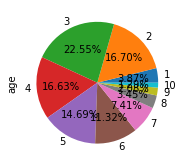

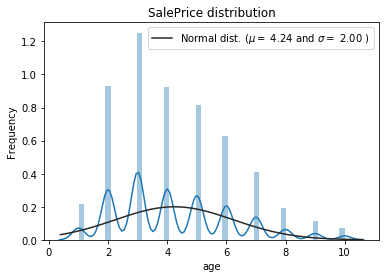

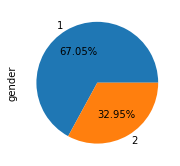

In [7]:
ax1 = plt.subplot(121)
df_user['age'].value_counts().sort_index().plot(kind='pie',autopct='%.2f%%')
display_distrib(df_user, 'age')
ax2 = plt.subplot(122)
df_user['gender'].value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%.2f%%')
# display_distrib(df_user_unique, 'gender')

In [8]:
df_user['age'].value_counts().sort_index()

1      3482
2     15031
3     20295
4     14966
5     13224
6     10190
7      6670
8      3106
9      1875
10     1161
Name: age, dtype: int64

## ad 分析

In [9]:
df_ad.head(5)
# \N 是啥？

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
1540468,2728318,2346473,\N,18,45185,36
2370064,4226944,3626219,8518,3,28366,21
2003484,3556871,3062677,1380,2,33242,238
192222,310380,278616,12197,8,22607,329
1842022,3270781,2813801,1849,2,55525,317


In [10]:
df_ad.dtypes

creative_id          int64
ad_id                int64
product_id          object
product_category     int64
advertiser_id        int64
industry            object
dtype: object

In [11]:
df_ad.isnull().sum()

creative_id         0
ad_id               0
product_id          0
product_category    0
advertiser_id       0
industry            0
dtype: int64

In [12]:
print("df_ad:\t", df_ad.shape)
# for key in ['creative_id', 'ad_id', 'product_id', 'product_category', 'advertiser_id', 'industry']:
for key in df_ad.columns:
    print(key, ':\t', df_ad[key].unique().shape)

df_ad:	 (24811, 6)
creative_id :	 (24811,)
ad_id :	 (24784,)
product_id :	 (3517,)
product_category :	 (18,)
advertiser_id :	 (9176,)
industry :	 (216,)


## click_log.csv 分析

In [13]:
df_click_log.head(5)

,time,user_id,creative_id,click_times
855,3,309244,360130,1
856,47,309244,1393232,1
857,39,309244,1831751,1
858,80,309244,2353377,1
859,27,309244,1393062,1


In [14]:
# https://blog.csdn.net/guofei_fly/article/details/93844612
df_click_log_sort_time = df_click_log.groupby('user_id', group_keys=False).apply(lambda x: x.sort_values('time'))
# df_click_log.groupby('user_id', group_keys=False).head(1000).apply(lambda x: x.sort_values('time'))

/home/mi/anaconda3/envs/venv3.6_tf1.10/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


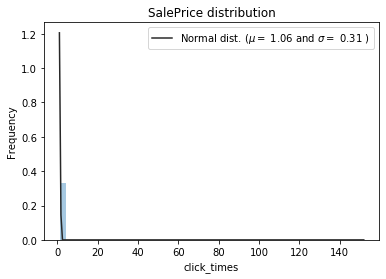

In [15]:
display_distrib(df_click_log, 'click_times')

In [16]:
df_click_log['click_times'].value_counts()

1      2851312
2       151555
3         9134
4         4330
5          762
6          385
7          181
8          161
9           41
10          27
11          18
12           9
13           9
18           4
20           4
14           3
15           3
16           2
21           2
30           1
17           1
19           1
24           1
25           1
26           1
152          1
Name: click_times, dtype: int64

In [17]:
# https://blog.csdn.net/toshibahuai/article/details/79034829
# df_user.to_csv('user.sample.csv', index=False)
# df_ad.to_csv('ad.sample.csv', index=False)
# df_click_log.to_csv('click_log.sample.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-17-c4599ba1a971>, line 1)

In [18]:
df_user.columns, df_ad.columns, df_click_log.columns

(Index(['user_id', 'age', 'gender'], dtype='object'),
 Index(['creative_id', 'ad_id', 'product_id', 'product_category',
        'advertiser_id', 'industry'],
       dtype='object'),
 Index(['time', 'user_id', 'creative_id', 'click_times'], dtype='object'))